This notebook has been inspired from [Tabular_SARSA](https://colab.research.google.com/github/probml/pyprobml/blob/master/notebooks/book2/35/supplementary/Tabular_SARSA.ipynb) by Amouzgar & Murphy and [SARSA Reinforcement Learning](https://www.geeksforgeeks.org/sarsa-reinforcement-learning/) by Alinda

# SARSA

In this notebook, we will implement SARSA Reinforcement learning algorithm for Frozen Lake Environment.

## Frozen Lake

Frozen lake is a toy text environment involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. <br>

We can also set the lake to be slippery so that the agent does not always move in the intended direction. \but here, we will only look at the non-slippery case. But you are welcome to try the slippery one.<br>

You can read more about the environment [here](https://gymnasium.farama.org/environments/toy_text/frozen_lake/).

![Frozen Lake](https://gymnasium.farama.org/_images/frozen_lake.gif)


## OpenAI Gym

[OpenAI Gym](https://www.gymlibrary.dev/) is a toolkit for developing and comparing reinforcement learning (RL) algorithms. It consists of a growing suite of environments (from simulated robots to Atari games), and a site for comparing and reproducing results. OpenAI Gym provides a diverse suite of environments that range from easy to difficult and involve many different kinds of data.

Creating and Interacting with gym environments is very simple.

```
import gym
env = gym.make("CartPole-v1")
observation, info = env.reset(seed=42)

for _ in range(1000):
    action = env.action_space.sample()
    observation, reward, done, truncated, info = env.step(action)

    if terminated or truncated:
        observation, info = env.reset()
env.close()
```

Following are the definitions of some common terminologies used.

**Reset:** Resets the environment to an initial state and returns the initial observation. <br>
**Step:** Run one timestep of the environment's dynamics.<br>
**Observation:** The observed state of the environment.<br>
**Action:** An action provided by the agent.<br>
**Reward:** The amount of reward returned as a result of taking the action.<br>
**Terminated:** Whether a terminal state (as defined under the MDP of the task) is reached.<br>
**Truncated:** Whether a truncation condition outside the scope of the MDP is satisfied. Typically a timelimit, but could also be used to indicate agent physically going out of bounds.<br>
**Info:** This contains auxiliary diagnostic information (helpful for debugging, learning, and logging).<br>
**Action Space:** This attribute gives the format of valid actions. It is of datatype Space provided by Gym. For example, if the action space is of type Discrete and gives the value Discrete(2), this means there are two valid discrete actions: 0 & 1.<br>
**Observation:** This attribute gives the format of valid observations. It is of datatype Space provided by Gym. For example, if the observation space is of type Box and the shape of the object is (4,), this denotes a valid observation will be an array of 4 numbers.<br>

Note: Previously, `terminated` and `truncated` used to be merged under one variable `done`. <br>


We will use OpenAI Gym for Frozen Lake environment.

## On-Policy vs. Off-Policy Algorithms

**On Policy:** In this, the learning agent learns the value function according to the current action derived from the policy currently being used.


**Off Policy:** In this, the learning agent learns the value function according to the action derived from another policy.

## SARSA Algorithm

SARSA algorithm is a slight variation of the Q-Learning algorithm. Q-Learning technique is an Off-Policy technique and uses the greedy approach to learn the Q-value. SARSA technique, on the other hand, is an On-Policy and uses the action performed by the current policy to learn the Q-value.

**Q-Learning:**
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left [ r(s,a) + \gamma \max_{a'} Q(s_{t+1},a') - Q(s_t,a_t) \right ]$$

**SARSA:**
$$Q(s_t,a_t) \leftarrow Q(s_t,a_t) + \alpha \left [ r(s,a) + \gamma Q(s_{t+1},a_{t+1}) - Q(s_t,a_t) \right ]$$

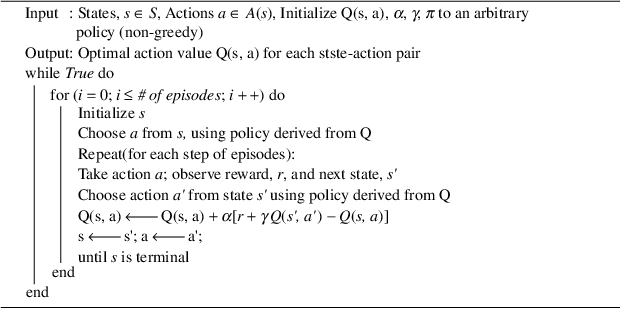

[Image Source](https://www.researchgate.net/publication/228410947_Adaptive_learning_by_a_target-tracking_system)

In [1]:
import numpy as np
import gym
import random

In [2]:
# Create the environment
env = gym.make("FrozenLake-v1", is_slippery=False, new_step_api=True)

### Q-Table

Now, we need to create Q-table. A Q table helps us find the best action for each state. It gives us the Q-value for each state-action pair.<br>

To know how much rows (states) and columns (actions) we need, we need to calculate the action_size and the state_size. OpenAI Gym provides us a way to do that.

In [3]:
state_size = env.observation_space.n
action_size = env.action_space.n

state_size, action_size

(16, 4)

In [4]:
# Create our Q table with state_size rows and action_size columns (64x4). We can set all values to zero for now.
qtable = np.zeros((state_size, action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


### Exploration vs Exploitation

Notice that SARSA only learns about the states and actions it visits. What if an optimal state remains unvisited due to not being explored. The agent should sometimes pick suboptimal actions in order to visit new states and actions. <br>

A simple strategy is to use an $\epsilon$-greedy policy. According to this policy, the agent takes a random action with epsilon probability. The value of epsilon is high at the start of training and low towards the end. So, the agent explores more at the start and then exploit the learned policy more at the end.

### Hyperparameters

In [5]:
# Here, we will specify the hyperparameters

total_episodes = 20000       # Total training episodes
learning_rate = 0.1          # Learning rate
max_steps = 99               # Max steps per episode
gamma = 0.95                 # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.0005           # Exponential decay rate for exploration prob

### Training

In [6]:
# List of rewards
rewards = []

# For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = #TODO Uniform 0 to 1

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if #TODO:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()


        # Take the action (a) and observe the outcome state(s') and reward (r)
        new_state, reward, terminated, truncated, info = #TODO
        done = terminated or truncated


        # We get the action for the new_state according to the policy
        exp_exp_tradeoff = random.uniform(0, 1)
        if #TODO:
            new_action = np.argmax(qtable[new_state,:])
        else:
            new_action = env.action_space.sample()

        # Update Q(s,a):= Q(s,a) + lr * [R(s,a) + gamma * Q(s',a') * (1-done) - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        qtable[state, action] = #TODO



        total_rewards += reward

        # Update the state
        state = #TODO

        # If done (if we're dead) : finish episode
        if done == True:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)
    print(f"Episode {episode}: Reward = {total_rewards}, Epsilon = {epsilon}")


print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Streaming output truncated to the last 5000 lines.
Episode 15017: Reward = 1.0, Epsilon = 0.010542919045917212
Episode 15018: Reward = 1.0, Epsilon = 0.010542647654247825
Episode 15019: Reward = 1.0, Epsilon = 0.010542376398240353
Episode 15020: Reward = 1.0, Epsilon = 0.010542105277826985
Episode 15021: Reward = 1.0, Epsilon = 0.010541834292939938
Episode 15022: Reward = 1.0, Epsilon = 0.01054156344351147
Episode 15023: Reward = 1.0, Epsilon = 0.010541292729473862
Episode 15024: Reward = 1.0, Epsilon = 0.01054102215075944
Episode 15025: Reward = 1.0, Epsilon = 0.01054075170730056
Episode 15026: Reward = 1.0, Epsilon = 0.010540481399029609
Episode 15027: Reward = 1.0, Epsilon = 0.01054021122587901
Episode 15028: Reward = 1.0, Epsilon = 0.010539941187781222
Episode 15029: Reward = 1.0, Epsilon = 0.010539671284668732
Episode 15030: Reward = 1.0, Epsilon = 0.010539401516474065
Episode 15031: Reward = 1.0, Epsilon = 0.010539131883129783
Episode 15032: Reward = 1.0, Epsilon = 0.010538862384

### Visualization

In [7]:
# For visualization
from gym.wrappers.monitoring import video_recorder
from IPython.display import HTML
from IPython import display
import glob
import base64, io, os

os.environ['SDL_VIDEODRIVER']='dummy'

In [8]:
os.makedirs("video", exist_ok=True)

def show_video(env_name):
    mp4list = glob.glob('video/*.mp4')
    if len(mp4list) > 0:
        mp4 = 'video/{}.mp4'.format(env_name)
        video = io.open(mp4, 'r+b').read()
        encoded = base64.b64encode(video)
        display.display(HTML(data='''<video alt="test" autoplay
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
        print("Could not find video")

def show_video_of_model(env_name):
    vid = video_recorder.VideoRecorder(env, path="video/{}.mp4".format(env_name))
    state = env.reset()
    done = False
    for t in range(max_steps):
        vid.capture_frame()
        action = np.argmax(qtable[state,:])
        next_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated
        print(f"state: {state}, action: {action}",next_state, reward, done)
        state = next_state
        if done:
            break
    vid.close()
    env.close()

In [9]:
show_video_of_model("FrozenLake-v1")

/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:78: DeprecationWarning: WARN: Recording ability for environment FrozenLake-v1 initialized with `render_mode=None` is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/monitoring/video_recorder.py:101: DeprecationWarning: WARN: <class 'gym.wrappers.monitoring.video_recorder.VideoRecorder'> is marked as deprecated and will be removed in the future.
  logger.deprecation(
/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


state: 0, action: 1 4 0.0 False
state: 4, action: 1 8 0.0 False
state: 8, action: 2 9 0.0 False
state: 9, action: 2 10 0.0 False
state: 10, action: 1 14 0.0 False
state: 14, action: 2 15 1.0 True


/usr/local/lib/python3.10/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


In [10]:
show_video("FrozenLake-v1")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
